In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from ISLP import load_data    # ISLP library for the book, it has built in functions and methods to build models 

from ISLP import confusion_table
from ISLP.models import contrast

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, accuracy_score

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'


sns.set(style="white") # Plot parameters defined globally
plt.style.use("seaborn-v0_8-white")             

## *13) Weekly Stock Market Data*

### It contains 1098 weekly returns for the S&P stock index for 21 years from the beginning of 1990 to the end of 2010. Volume is in billions, Returns are percentage returns. 

In [3]:
df_weekly = load_data('Weekly')

df_weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [4]:
print(f"Total number of weeks in the data set: {len(df_weekly):.2f}")

Total number of weeks in the data set: 1089.00


In [358]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [5]:
df_weekly[df_weekly['Year']== 1990]

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0   1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1   1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2   1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3   1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4   1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
5   1990  1.178  0.712  3.514 -2.576 -0.270  0.154444 -1.372      Down
6   1990 -1.372  1.178  0.712  3.514 -2.576  0.151722  0.807        Up
7   1990  0.807 -1.372  1.178  0.712  3.514  0.132310  0.041        Up
8   1990  0.041  0.807 -1.372  1.178  0.712  0.143972  1.253        Up
9   1990  1.253  0.041  0.807 -1.372  1.178  0.133635 -2.678      Down
10  1990 -2.678  1.253  0.041  0.807 -1.372  0.149024 -1.793      Down
11  1990 -1.793 -2.678  1.253  0.041  0.807  0.135790  2.820        Up
12  1990  2.820 -1.793 -2.678  1.253  0.041  0.139898  4.022        Up
13  1990  4.022  2.820 -1.793 -2.678  1.253  0.164342  0.750        Up
14  1990  0.750  4.022  2.820 -1.793 -2.678  0.175648 -0.017      Down
15  1990 -0.017  0.750  4.022  2.820 -1.793  0.163470  2.420        Up
16  1990  2.420 -0.017  0.750  4.022  2.820  0.172625 -1.225      Down
17  1990 -1.225  2.420 -0.017  0.750  4.022  0.168446  1.171        Up
18  1990  1.171 -1.225  2.420 -0.017  0.750  0.155292 -2.061      Down
19  1990 -2.061  1.171 -1.225  2.420 -0.017  0.143392  0.729        Up
20  1990  0.729 -2.061  1.171 -1.225  2.420  0.140554  0.112        Up
21  1990  0.112  0.729 -2.061  1.171 -1.225  0.125075  2.480        Up
22  1990  2.480  0.112  0.729 -2.061  1.171  0.171604 -1.552      Down
23  1990 -1.552  2.480  0.112  0.729 -2.061  0.166956 -2.259      Down
24  1990 -2.259 -1.552  2.480  0.112  0.729  0.171718 -2.428      Down
25  1990 -2.428 -2.259 -1.552  2.480  0.112  0.209816 -2.708      Down
26  1990 -2.708 -2.428 -2.259 -1.552  2.480  0.192706 -2.292      Down
27  1990 -2.292 -2.708 -2.428 -2.259 -1.552  0.148252 -4.978      Down
28  1990 -4.978 -2.292 -2.708 -2.428 -2.259  0.189858  3.547        Up
29  1990  3.547 -4.978 -2.292 -2.708 -2.428  0.127884  0.260        Up
30  1990  0.260  3.547 -4.978 -2.292 -2.708  0.115742 -2.032      Down
31  1990 -2.032  0.260  3.547 -4.978 -2.292  0.123924 -1.739      Down
32  1990 -1.739 -2.032  0.260  3.547 -4.978  0.149082 -1.693      Down
33  1990 -1.693 -1.739 -2.032  0.260  3.547  0.171856  1.781        Up
34  1990  1.781 -1.693 -1.739 -2.032  0.260  0.164970 -3.682      Down
35  1990 -3.682  1.781 -1.693 -1.739 -2.032  0.156454  4.150        Up
36  1990  4.150 -3.682  1.781 -1.693 -1.739  0.180280 -2.487      Down
37  1990 -2.487  4.150 -3.682  1.781 -1.693  0.143978  2.343        Up
38  1990  2.343 -2.487  4.150 -3.682  1.781  0.154292  0.606        Up
39  1990  0.606  2.343 -2.487  4.150 -3.682  0.148006  1.077        Up
40  1990  1.077  0.606  2.343 -2.487  4.150  0.163550 -0.637      Down
41  1990 -0.637  1.077  0.606  2.343 -2.487  0.126532  2.260        Up
42  1990  2.260 -0.637  1.077  0.606  2.343  0.151578  1.716        Up
43  1990  1.716  2.260 -0.637  1.077  0.606  0.197994 -0.284      Down
44  1990 -0.284  1.716  2.260 -0.637  1.077  0.155874  1.508        Up
45  1990  1.508 -0.284  1.716  2.260 -0.637  0.176700 -0.913      Down
46  1990 -0.913  1.508 -0.284  1.716  2.260  0.087465 -2.349      Down

In [6]:
df_weekly.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75%       1.405000     2.053727     1.405000  
max      12.026000     9.328214    12.026000

### a)

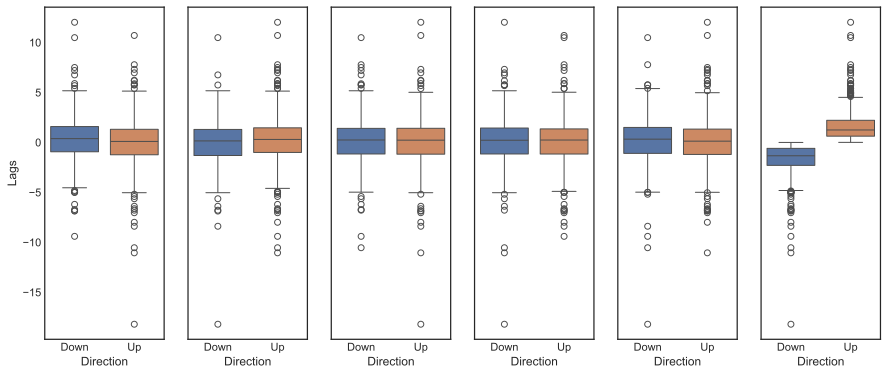

In [7]:
# Lets have a look at the relationship between weekly lagged percentage returns with todays direction

a_cols = [col for col in df_weekly.columns.tolist() if col not in ['Direction', 'Year', 'Volume']]

fig, axes = plt.subplots(nrows = 1, ncols = len(a_cols), figsize = (15,6), sharey=True)

for ci, column in enumerate(a_cols):
    
    sns.boxplot(x = 'Direction', y = f"{column}", data = df_weekly, ax=axes[ci], hue = 'Direction')

    #axes[ci].set_title(column)
    axes[ci].set_ylabel('Lags') #lazy solution to reset the y axis label which returns 'Lag1' unless this synthax is added

    
plt.show()

### Not any Weekly Lags has strong relationship with todays market direction, apart from the obvious relationship with todays percentage returns, e.g when it is positive direction is up and vice versa.

<Axes: xlabel='Direction', ylabel='Volume'>

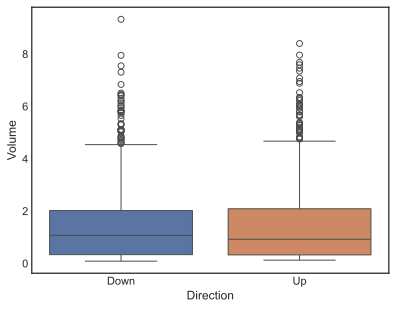

In [8]:
sns.boxplot(x = 'Direction', y = 'Volume', data = df_weekly, hue = 'Direction')

### Volume also does not appear to have any particular relationship between todays market direction

In [9]:

sns.pairplot(df_weekly, height=2.)

plt.show()

### Some of the findings above can be confirmed from the above pairplot as well. Lagged percentage returns also do not seem to have any relationship with each other, nor with the todays percentage return. The only strong relationship is between year and volume as it latter exponentially rise towards 2010. 

###

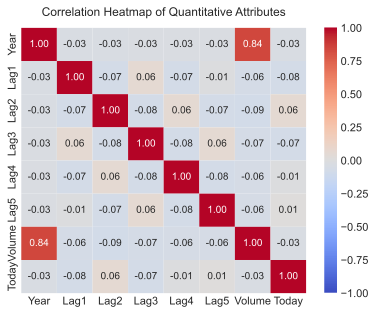

In [10]:
quant_cols = [col for col in df_weekly.columns.tolist() if col not in ['Direction']]

Wmarket_CorrM = df_weekly[quant_cols].corr()

heatmp = sns.heatmap(Wmarket_CorrM, vmin=-1, vmax=1, annot = True, fmt=".2f", annot_kws={"size": 10}, cmap = 'coolwarm') # .corr() automatically ignores the qualitative 'Direction'

heatmp.set_title('Correlation Heatmap of Quantitative Attributes', fontdict={'fontsize':12}, pad=12);

<Axes: >

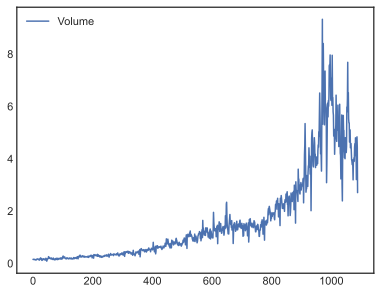

In [11]:
df_weekly.plot(y = 'Volume')

<Axes: >

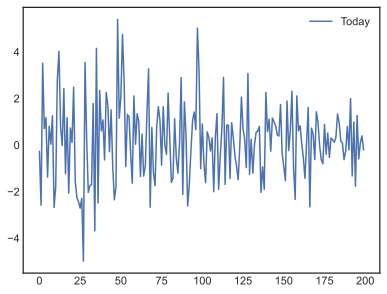

In [12]:
df_weekly[:200].plot(y = 'Today') # non-stationary time-series

### b) Fit a logistic regression model using five lag variables and volume as predictors vs Direction

In [34]:
X_df = df_weekly.drop('Direction', axis = 1) # all attributes df

fit_cols = X_df.columns.drop(['Today','Year'])

X = sm.add_constant(X_df[fit_cols]) # add an intercept
y = df_weekly.Direction == 'Up' # returns Up and Down to True and False that can be processed by the Logistic reg below

logreg = sm.GLM(y,X,family=sm.families.Binomial())

results_logreg = logreg.fit()

print(results_logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Wed, 20 Dec 2023   Deviance:                       1486.4
Time:                        14:14:57   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.0

### There appear to be only lag2 has statistically significant relationship for the response, its coefficient is positive indicating that if market is up two weeks ago, it will likely go up today, though the relationship is not so significant. 

### c) Compute the confusion matrix and overall fraction of the correct predictions. Comment on the confusion matrix and what types of mistakes Log-Reg is making. 

In [35]:
probs = results_logreg.predict(X) #training predictions as probabilities

p_labels = np.array(['Down'] * df_weekly.shape[0])

p_labels[probs > 0.5] = 'Up'

pd.crosstab(p_labels, df_weekly['Direction'], rownames=['Predicted'], colnames = ['True'])

True       Down   Up
Predicted           
Down         54   48
Up          430  557

In [36]:
# Accuracy and error on the test set 

print(f"Overall Accuracy and Error rate of the Log-reg on the training set are {np.mean(p_labels == df_weekly['Direction']):.2f}, {np.mean(p_labels != df_weekly['Direction']):.2f}")

Overall Accuracy and Error rate of the Log-reg on the training set are 0.56, 0.44


In [37]:
CM = confusion_matrix(p_labels, df_weekly['Direction'])

### Assuming positive labels as the 'Up' and negatives as 'Down', logistic regression 430 times incorrectly predicts 'Up' while the market is acually 'Down', that is False Positive (FP) predictions is FP = 430. On the other hand, log-reg predicts 48 times Down while the market is actually Up, i.e FN = 48. The model correctly identifies 54 times the market will go down, TN =54 while 554 it correctly predicts the market will go Up, TP = 557.  

In [38]:
print(f"Accuracy of log-reg on days it predicts an Upward trend: {(CM[1,1]/CM[1].sum())*100:.2f}%") # TP / (FP + TP)
print("\n")
print(f"Accuracy of log-reg on days it predicts a Downward trend: {(CM[0,0]/CM[0].sum())*100:.2f}%") # TP / (FP + TP)

Accuracy of log-reg on days it predicts an Upward trend: 56.43%


Accuracy of log-reg on days it predicts a Downward trend: 52.94%


### d)

In [39]:
train_slice = df_weekly['Year'] < 2009

X_df = X_df.drop(columns=[col for col in X_df.columns.tolist() if col not in ['Lag2']]) # Lag2 is chosen as the only predictor

X_train, y_train = X_df[train_slice], y[train_slice]

X_test, y_test = X_df[~(train_slice)], y[~(train_slice)]

X_train = sm.add_constant(X_train) # add an intercept
X_test = sm.add_constant(X_test) # add an intercept

logreg2 = sm.GLM(y_train,X_train,family=sm.families.Binomial())

results_logreg2 = logreg2.fit()

print(results_logreg2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Wed, 20 Dec 2023   Deviance:                       1350.5
Time:                        14:15:29   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.0

In [40]:
probs2 = results_logreg2.predict(X_test) #training predictions as probabilities

p_labels2 = np.array(['Down'] * X_test.shape[0])

p_labels2[probs2 > 0.5] = 'Up'

pd.crosstab(p_labels2, df_weekly.Direction[~(train_slice)], rownames=['Predicted'], colnames = ['True'])

True       Down  Up
Predicted          
Down          9   5
Up           34  56

In [41]:
print(f"Overall Test Accuracy and Error rate of the Log-reg onto Lag2 are {np.mean(p_labels2 == df_weekly.Direction[~(train_slice)]):.3f}, {np.mean(p_labels2 != df_weekly.Direction[~(train_slice)]):.3f}")

Overall Test Accuracy and Error rate of the Log-reg onto Lag2 are 0.625, 0.375


### e)-i)

In [42]:
X_trainn, X_testn= [M.drop(columns = ['const']) for M in [X_train,X_test]] # Classifiers in scikitlearn does not require a constant term in the feature matrix 

y_train, y_test = df_weekly.Direction[train_slice], df_weekly.Direction[~(train_slice)]


In [43]:


lda = LDA(store_covariance=False)
qda = QDA(store_covariance=False)
knn = KNN(n_neighbors=1)
nbc = GaussianNB()

weekly_models = [lda, qda, knn, nbc]

def acc_scores(X_train, y_train, X_test, y_test):

    for model in weekly_models:

        model_fit = model.fit(X_train, y_train)

        label_pred = model_fit.predict(X_test)

        cm = confusion_matrix(label_pred,y_test)

        print(f"Overall accuracy of the {str(model)} on the test set is {np.mean(label_pred == y_test) * 100:.3f}%")
        print(f"Test Accuracy of the {str(model)} on days it predicts an Upward trend is {(cm[1,1]/cm[1].sum())*100:.3f}%")
        #print(f"Overall accuracy of the {str(model)} on the test set is {model.score(X_test,y_test) * 100:.3f}%") # shortcut for the overall accuracy score via .score()
        print('\n')


acc_scores(X_trainn,y_train,X_testn,y_test)

Overall accuracy of the LinearDiscriminantAnalysis() on the test set is 62.500%
Test Accuracy of the LinearDiscriminantAnalysis() on days it predicts an Upward trend is 62.222%


Overall accuracy of the QuadraticDiscriminantAnalysis() on the test set is 58.654%
Test Accuracy of the QuadraticDiscriminantAnalysis() on days it predicts an Upward trend is 58.654%


Overall accuracy of the KNeighborsClassifier(n_neighbors=1) on the test set is 50.000%
Test Accuracy of the KNeighborsClassifier(n_neighbors=1) on days it predicts an Upward trend is 58.491%


Overall accuracy of the GaussianNB() on the test set is 58.654%
Test Accuracy of the GaussianNB() on days it predicts an Upward trend is 58.654%




### Based on these results Logistic Regression and the LDA appears to be best methods in terms of the overall prediction accuracy.

### j)

In [44]:
X_df = df_weekly.drop('Direction', axis = 1) # all attributes df

feature_choice = ['Lag2', 'Lag4'] # feature choices that can be played with

X_df = X_df.drop(columns=[col for col in X_df.columns.tolist() if col not in feature_choice]) 

#X_df['L1-Vol'] = X_df['Lag1'] * X_df['Volume'] # Introduce an interaction to experiment with different combinations

scaler = StandardScaler(with_mean=True, with_std=True, copy = True) # scale all the features 

sfit = scaler.fit(X_df)

X_std = sfit.transform(X_df)

In [45]:
X_df_std = pd.DataFrame(X_std, columns = X_df.columns) # scaled feature matrix 

In [46]:
X_df_std

Lag2      Lag4
0     0.603063 -0.158875
1     0.282204 -1.730174
2    -0.178713  0.604521
3    -1.157419  0.284072
4     1.427282 -0.176254
...        ...       ...
1084 -0.045871  1.463712
1085 -0.429544 -0.982885
1086  1.195974 -0.043582
1087  0.479558 -0.426763
1088  0.055990  1.196672

[1089 rows x 2 columns]

In [47]:
X_df_std['Lag2'].mean(), X_df_std['Lag2'].std() # standardized features have zero mean and std of unity 

(1.3049453365658405e-17, 1.0004594532748738)

In [48]:
X_trains, X_tests  = X_df_std[train_slice], X_df_std[~(train_slice)]

y_train, y_test = df_weekly.Direction[train_slice], df_weekly.Direction[~(train_slice)] 

In [49]:
acc_scores(X_trains,y_train,X_tests,y_test) 

Overall accuracy of the LinearDiscriminantAnalysis() on the test set is 62.500%
Test Accuracy of the LinearDiscriminantAnalysis() on days it predicts an Upward trend is 61.957%


Overall accuracy of the QuadraticDiscriminantAnalysis() on the test set is 53.846%
Test Accuracy of the QuadraticDiscriminantAnalysis() on days it predicts an Upward trend is 58.025%


Overall accuracy of the KNeighborsClassifier(n_neighbors=1) on the test set is 56.731%
Test Accuracy of the KNeighborsClassifier(n_neighbors=1) on days it predicts an Upward trend is 63.793%


Overall accuracy of the GaussianNB() on the test set is 53.846%
Test Accuracy of the GaussianNB() on days it predicts an Upward trend is 57.647%




In [50]:
## Same features without scaling, the results are identical as far as we use lagged variables as they have the same overall scale, mean and std in the original dataset

X_train, X_test  = X_df[train_slice], X_df[~(train_slice)]

acc_scores(X_train,y_train,X_test,y_test) 

Overall accuracy of the LinearDiscriminantAnalysis() on the test set is 62.500%
Test Accuracy of the LinearDiscriminantAnalysis() on days it predicts an Upward trend is 61.957%


Overall accuracy of the QuadraticDiscriminantAnalysis() on the test set is 53.846%
Test Accuracy of the QuadraticDiscriminantAnalysis() on days it predicts an Upward trend is 58.025%


Overall accuracy of the KNeighborsClassifier(n_neighbors=1) on the test set is 56.731%
Test Accuracy of the KNeighborsClassifier(n_neighbors=1) on days it predicts an Upward trend is 63.793%


Overall accuracy of the GaussianNB() on the test set is 53.846%
Test Accuracy of the GaussianNB() on days it predicts an Upward trend is 57.647%




### Adding one more feature 'Lag4' increased the KNN's performance. By experimenting, one can see that in general adding Volume and its interaction with any lagged variables gives much worse results. Lets try to fine tune KNN more by playing with the K parameter. LDA'S performence in this context is almost unchanged. 

In [51]:
for K in range(1,11):

    knn = KNN(n_neighbors=K)
    
    knn_pred = knn.fit(X_trains, y_train).predict(X_test)

    print(f"Overall accuracy of the KNN classifier with K = {K} on the test set is {knn.score(X_tests,y_test) * 100:.3f}%")
    

Overall accuracy of the KNN classifier with K = 1 on the test set is 56.731%
Overall accuracy of the KNN classifier with K = 2 on the test set is 61.538%
Overall accuracy of the KNN classifier with K = 3 on the test set is 59.615%
Overall accuracy of the KNN classifier with K = 4 on the test set is 56.731%
Overall accuracy of the KNN classifier with K = 5 on the test set is 48.077%
Overall accuracy of the KNN classifier with K = 6 on the test set is 50.000%
Overall accuracy of the KNN classifier with K = 7 on the test set is 53.846%
Overall accuracy of the KNN classifier with K = 8 on the test set is 49.038%
Overall accuracy of the KNN classifier with K = 9 on the test set is 52.885%
Overall accuracy of the KNN classifier with K = 10 on the test set is 51.923%


### K = 2 performence is almost as good as LDA when the overall accuracy is the criterion